## Movie Recommendation System

In [ ]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

### Data Pre-processing

In [ ]:
# loading the dataset
ratings_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('ratings.dat', sep='::', encoding='latin-1', names=ratings_cols)

movies_cols =['movie_id', 'title', 'genres']
movies = pd.read_csv('movies.dat', sep='::', encoding='latin-1', names=movies_cols)

users_cols = ['user_id', 'gender', 'age', 'occupation', 'zipcode']
users = pd.read_csv('users.dat', sep='::', encoding='latin-1', names=users_cols)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if _

In [ ]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
users.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# specifying Users age and occupation
AGES = { 1: "Under 18", 18: "18-24", 25: "25-34", 35: "35-44", 45: "45-49", 50: "50-55", 56: "56+" }
OCCUPATIONS = { 0: "other or not specified", 1: "academic/educator", 2: "artist", 3: "clerical/admin",
                4: "college/grad student", 5: "customer service", 6: "doctor/health care",
                7: "executive/managerial", 8: "farmer", 9: "homemaker", 10: "K-12 student", 11: "lawyer",
                12: "programmer", 13: "retired", 14: "sales/marketing", 15: "scientist", 16: "self-employed",
                17: "technician/engineer", 18: "tradesman/craftsman", 19: "unemployed", 20: "writer" }

In [ ]:
# Define csv files to be saved into
USERS_CSV_FILE = 'users.csv'
MOVIES_CSV_FILE = 'movies.csv'
RATINGS_CSV_FILE = 'ratings.csv'

In [ ]:
# Set max_userid to the maximum user_id in the ratings
max_userid = ratings['user_id'].drop_duplicates().max()
# Set max_movieid to the maximum movie_id in the ratings
max_movieid = ratings['movie_id'].drop_duplicates().max()

# Process ratings dataframe for Keras Deep Learning model
# Add user_emb_id column whose values == user_id - 1
# ratings['user_emb_id'] = ratings['user_id'] - 1
# # Add movie_emb_id column whose values == movie_id - 1
# ratings['movie_emb_id'] = ratings['movie_id'] - 1

print(len(ratings), 'ratings loaded')

1000209 ratings loaded


In [ ]:
# creating a ratings.csv for importing it in further codes: Save into ratings.csv
# ratings.to_csv(RATINGS_CSV_FILE,
#                sep='\t',
#                header=True,
#                encoding='latin-1',
#                columns=['user_id', 'movie_id', 'rating', 'timestamp', 'user_emb_id', 'movie_emb_id'])

ratings.to_csv(RATINGS_CSV_FILE,
               sep='\t',
               header=True,
               encoding='latin-1',
               columns=['user_id', 'movie_id', 'rating', 'timestamp'])
print('Saved to', RATINGS_CSV_FILE)

Saved to ratings.csv


In [ ]:
users['age_desc'] = users['age'].apply(lambda x: AGES[x])
users['occ_desc'] = users['occupation'].apply(lambda x: OCCUPATIONS[x])
print (len(users), 'descriptions of', max_userid, 'users loaded.')

6040 descriptions of 6040 users loaded.


In [ ]:
users.to_csv(USERS_CSV_FILE,
             sep='\t',
             header=True,
             encoding='latin-1',
             columns=['user_id', 'gender', 'age', 'occupation', 'zipcode', 'age_desc', 'occ_desc'])
print ('Saved to', USERS_CSV_FILE)

Saved to users.csv


In [ ]:
# Save into movies.csv
movies.to_csv(MOVIES_CSV_FILE,
              sep='\t',
              header=True,
              columns=['movie_id', 'title', 'genres'])
print('Saved to', MOVIES_CSV_FILE)

Saved to movies.csv


In [ ]:
# Reading ratings file
# ratings = pd.read_csv('ratings.csv', sep='\t', encoding='latin-1',
#                       usecols=['user_id', 'movie_id', 'user_emb_id', 'movie_emb_id', 'rating'])
ratings = pd.read_csv('ratings.csv', sep='\t', encoding='latin-1',
                      usecols=['user_id', 'movie_id', 'rating'])

max_userid = ratings['user_id'].drop_duplicates().max()
max_movieid = ratings['movie_id'].drop_duplicates().max()

# Reading ratings file
users = pd.read_csv('users.csv', sep='\t', encoding='latin-1',
                    usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading ratings file
movies = pd.read_csv('movies.csv', sep='\t', encoding='latin-1',
                     usecols=['movie_id', 'title', 'genres'])

In [ ]:
ratings.head()

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [ ]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
users.head()

,user_id,gender,zipcode,age_desc,occ_desc
0,1,F,48067,Under 18,K-12 student
1,2,M,70072,56+,self-employed
2,3,M,55117,25-34,scientist
3,4,M,02460,45-49,executive/managerial
4,5,M,55455,25-34,writer


In [ ]:
user_ids = ratings["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}
movie_ids = ratings["movie_id"].unique().tolist()
movie2movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded2movie = {i: x for i, x in enumerate(movie_ids)}

ratings["user"] = ratings["user_id"].map(user2user_encoded)
ratings["movie"] = ratings["movie_id"].map(movie2movie_encoded)

num_users = len(user2user_encoded)
num_movies = len(movie_encoded2movie)

ratings["rating"] = ratings["rating"].values.astype(np.float32)
# min and max ratings will be used to normalize the ratings later
min_rating = min(ratings["rating"])
max_rating = max(ratings["rating"])

print(
    "Number of users: {}, Number of Movies: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_movies, min_rating, max_rating
    )
)
df = ratings

Number of users: 6040, Number of Movies: 3706, Min rating: 1.0, Max rating: 5.0


In [ ]:
#splitting the data into training and validation
df = df.sample(frac=1, random_state=19)
x = df[["user", "movie"]].values
# Normalize the targets between 0 and 1. Makes it easy to train.
y = df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
# Assuming training on 80% of the data and validating on 20%.
train_indices = int(0.80 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

In [ ]:
EMBEDDING_SIZE = 64

class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(0.001),
        )

        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(0.001),
        )
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        # Add all the components (including bias)
        x = dot_user_movie + user_bias + movie_bias
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(x)


model = RecommenderNet(num_users, num_movies, EMBEDDING_SIZE)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(lr=0.001), metrics=['accuracy']
)

In [ ]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=10,
    verbose=1,
    validation_data=(x_val, y_val),
)
model.summary()

Epoch 1/10
12503/12503 [==============================] - 71s 6ms/step - loss: 0.6470 - accuracy: 0.2361 - val_loss: 0.5951 - val_accuracy: 0.2562
Epoch 2/10
12503/12503 [==============================] - 72s 6ms/step - loss: 0.5928 - accuracy: 0.2574 - val_loss: 0.5910 - val_accuracy: 0.2576
Epoch 3/10
12503/12503 [==============================] - 72s 6ms/step - loss: 0.5900 - accuracy: 0.2588 - val_loss: 0.5902 - val_accuracy: 0.2582
Epoch 4/10
12503/12503 [==============================] - 72s 6ms/step - loss: 0.5888 - accuracy: 0.2583 - val_loss: 0.5900 - val_accuracy: 0.2583
Epoch 5/10
12503/12503 [==============================] - 72s 6ms/step - loss: 0.5887 - accuracy: 0.2586 - val_loss: 0.5900 - val_accuracy: 0.2585
Epoch 6/10
12503/12503 [==============================] - 72s 6ms/step - loss: 0.5893 - accuracy: 0.2575 - val_loss: 0.5901 - val_accuracy: 0.2583
Epoch 7/10
12503/12503 [==============================] - 71s 6ms/step - loss: 0.5886 - accuracy: 0.2583 - val_loss: 0

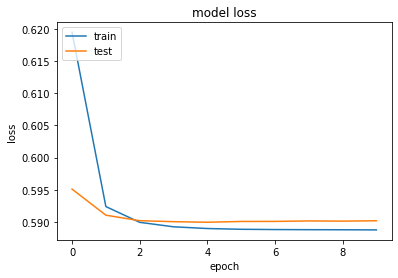

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

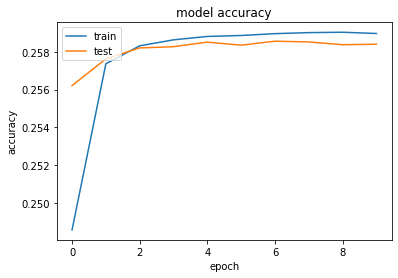

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
movie_df = movies

# Let us get a user and see the top recommendations.
user_id = df.user_id.sample(1).iloc[0]
movies_watched_by_user = df[df.user_id == user_id]
movies_not_watched = movie_df[
    ~movie_df["movie_id"].isin(movies_watched_by_user.movie_id.values)
]["movie_id"]
movies_not_watched = list(
    set(movies_not_watched).intersection(set(movie2movie_encoded.keys()))
)
movies_not_watched = [[movie2movie_encoded.get(x)] for x in movies_not_watched]
user_encoder = user2user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movies_not_watched), movies_not_watched)
)
ratings = model.predict(user_movie_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded2movie.get(movies_not_watched[x][0]) for x in top_ratings_indices
]

print("Showing recommendations for user: {}".format(user_id))
print("====" * 9)
print("Movies with high ratings from user")
print("----" * 8)
top_movies_user = (
    movies_watched_by_user.sort_values(by="rating", ascending=False)
    .head(5)
    .movie_id.values
)

movie_df_rows = movie_df[movie_df["movie_id"].isin(top_movies_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ":", row.genres)

print("----" * 8)
print("Top 10 movie recommendations")
print("----" * 8)
recommended_movies = movie_df[movie_df["movie_id"].isin(recommended_movie_ids)]
for row in recommended_movies.itertuples():
    print(row.title, ":", row.genres)

Showing recommendations for user: 5570
Movies with high ratings from user
--------------------------------
Desperado (1995) : Action|Romance|Thriller
Monty Python and the Holy Grail (1974) : Comedy
Wrong Trousers, The (1993) : Animation|Comedy
Strangers on a Train (1951) : Film-Noir|Thriller
Total Recall (1990) : Action|Adventure|Sci-Fi|Thriller
--------------------------------
Top 10 movie recommendations
--------------------------------
Usual Suspects, The (1995) : Crime|Thriller
Pather Panchali (1955) : Drama
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) : Film-Noir
To Kill a Mockingbird (1962) : Drama
Third Man, The (1949) : Mystery|Thriller
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954) : Action|Drama
Sanjuro (1962) : Action|Adventure
General, The (1927) : Comedy
Yojimbo (1961) : Comedy|Drama|Western
City Lights (1931) : Comedy|Drama|Romance
